In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams['figure.figsize'] = [20, 20]
sns.set_palette("colorblind")
import numpy as np

In [4]:
data = pd.read_csv('clustering.csv',header=None)
data.columns = ['x','y']

Najpierw skorzystam z faktu ,że dane mają tylko 2 wymiary i przyjżę się im przed klasteryzacją.



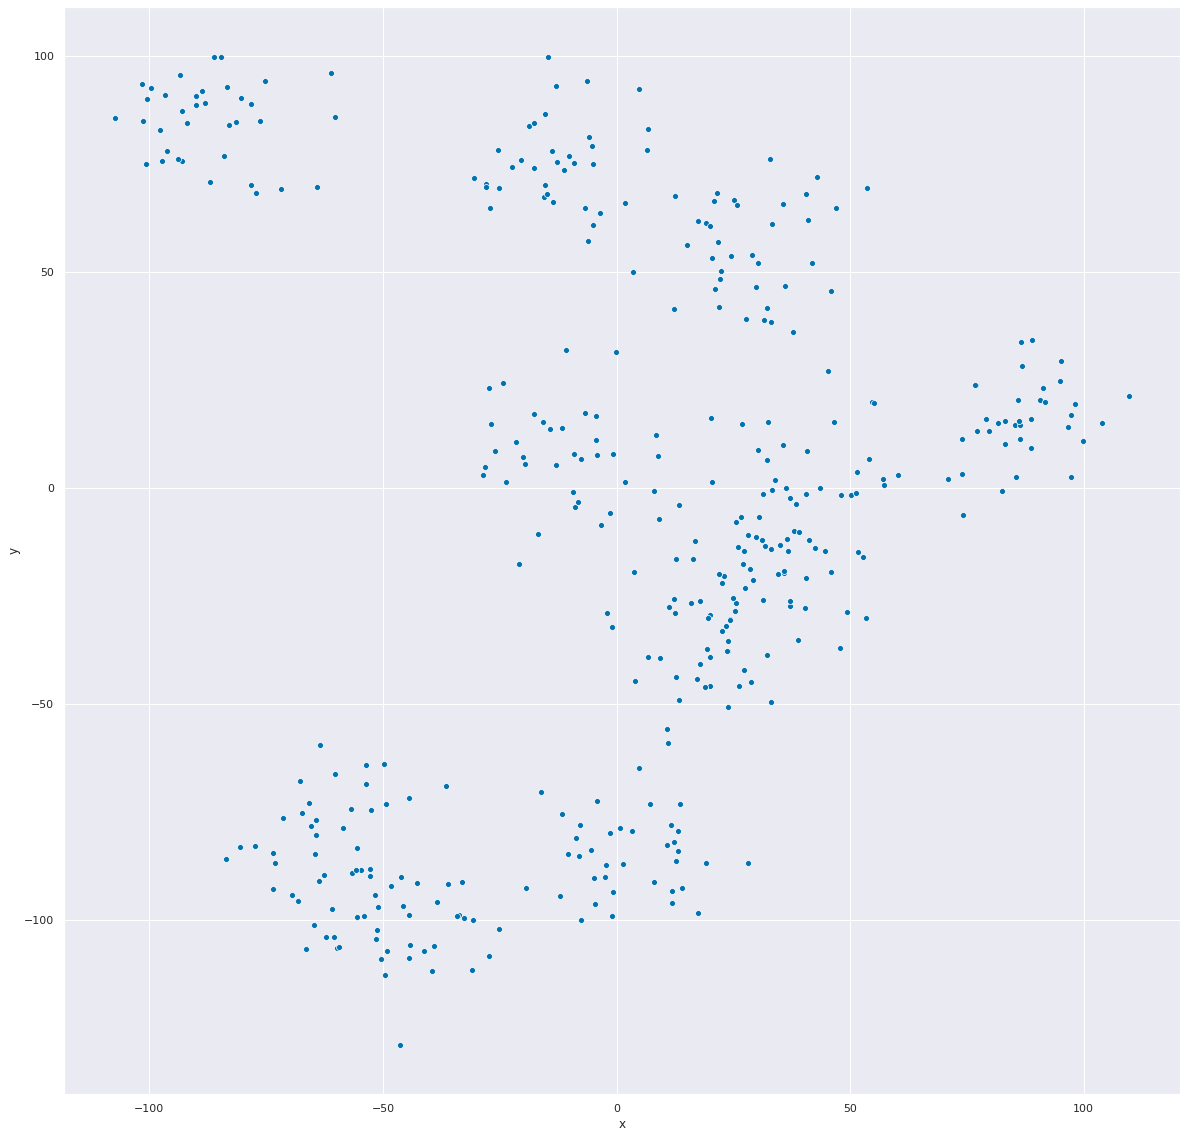

In [5]:


sns.scatterplot(x="x", y="y", data=data)

Dane wydają sie być idalnie przystosowane do klasteryzacij , "ręcznie" można wyróżnić od 5 do 8 klastrów.

Metoda 1 KMeans
====
Jako sposób wyboru liczby klastrów wykorzystam metodę łokciową.

In [6]:

from sklearn.cluster import KMeans


def elbow_method(startk,endk,data):
    scores = []
    for i in range(startk,endk+1):
         scores.append(-KMeans(i,random_state=0).fit(data).score(data))
    
    # data 
    df = pd.DataFrame({'clusters':[i for i in range(startk,endk+1)],'scores':scores})
    #
    plt.plot(df.clusters, df.scores, 'bx-',markersize=12)
    plt.xlabel('Cluster')
    plt.ylabel('Scores')
    plt.xticks(fontsize=14)
    plt.title('Elbow Method')
    plt.xticks([i for i in range(startk,endk+1)])
    plt.show()

    

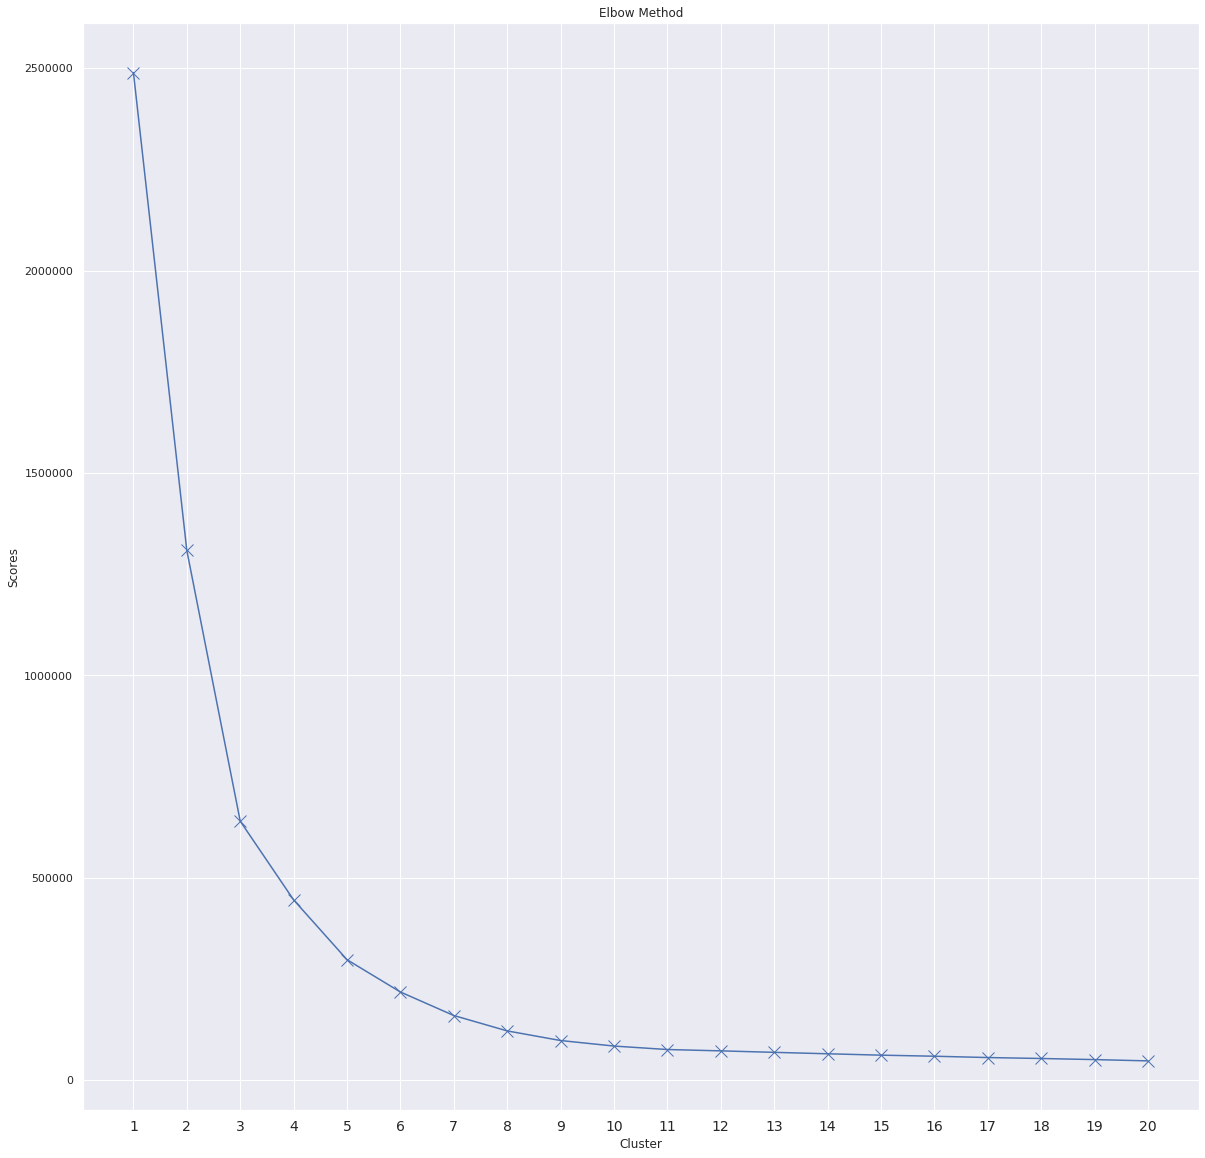

In [7]:
elbow_method(1,20,data)

Wykres nie daje jednoznacznego wyniku. Sprawdzę dwie możliwe wartości, które wydają się być właściwe 6 i 7. Tak samo można za właściwą uznać na przykład wartość 5.

/home/jan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


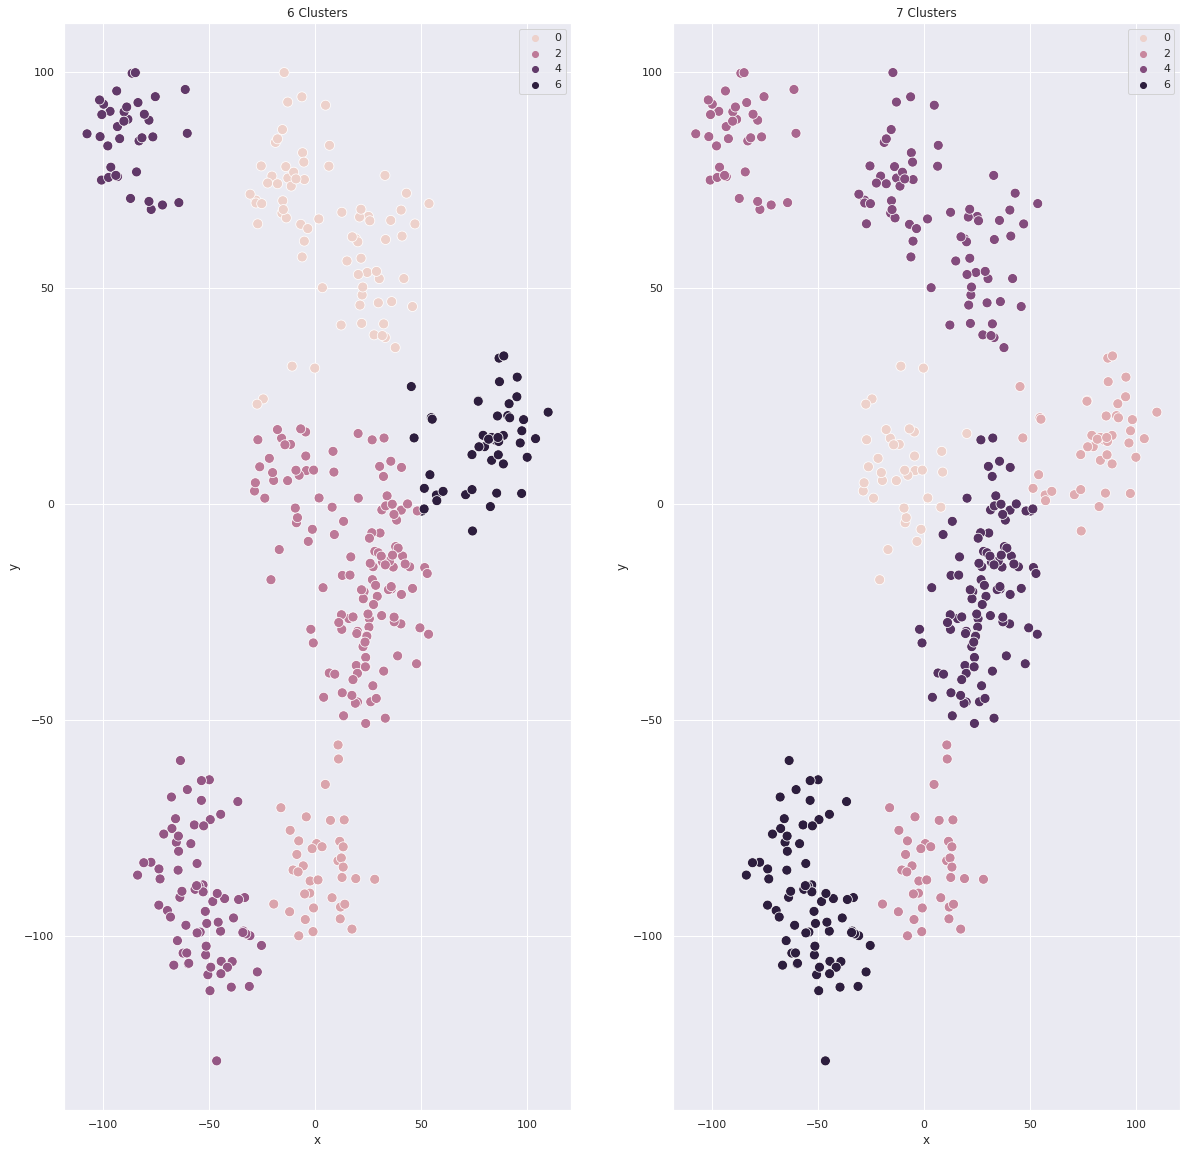

In [27]:
def label_gen(data,k):
    kmeans = KMeans(k, random_state=0).fit(data)
    return kmeans.labels_

fig, ax =plt.subplots(1,2)
sns.scatterplot(data=data,x='x',y='y', ax=ax[0],hue=label_gen(data,6),s=100).set_title('6 Clusters')
sns.scatterplot(data=data,x='x',y='y', ax=ax[1],hue=label_gen(data,7),s=100).set_title('7 Clusters')
fig.show()


Nie sposób wybrać który podział jest lepszy. Posłużenie się jakąś metryką mogłoby pomóc ale w żaden sposób nie zagwarantuje, że wybrany podział bedzie arbitralnie lepszy. Oceniając jedynie powierzchownie wydaje się ,że sensowniejszy jest podział na 7 klastrów. Punkty znajdujące się w środku zbioru wydają się być bardziej sensownie podzielone niż w przypadku 6. 

Metoda 2 AgglomerativeClustering z parametrem linkage='ward'
====
Do wyboru ilości klastrów wykorzystam indeks Daviesa–Bouldina.

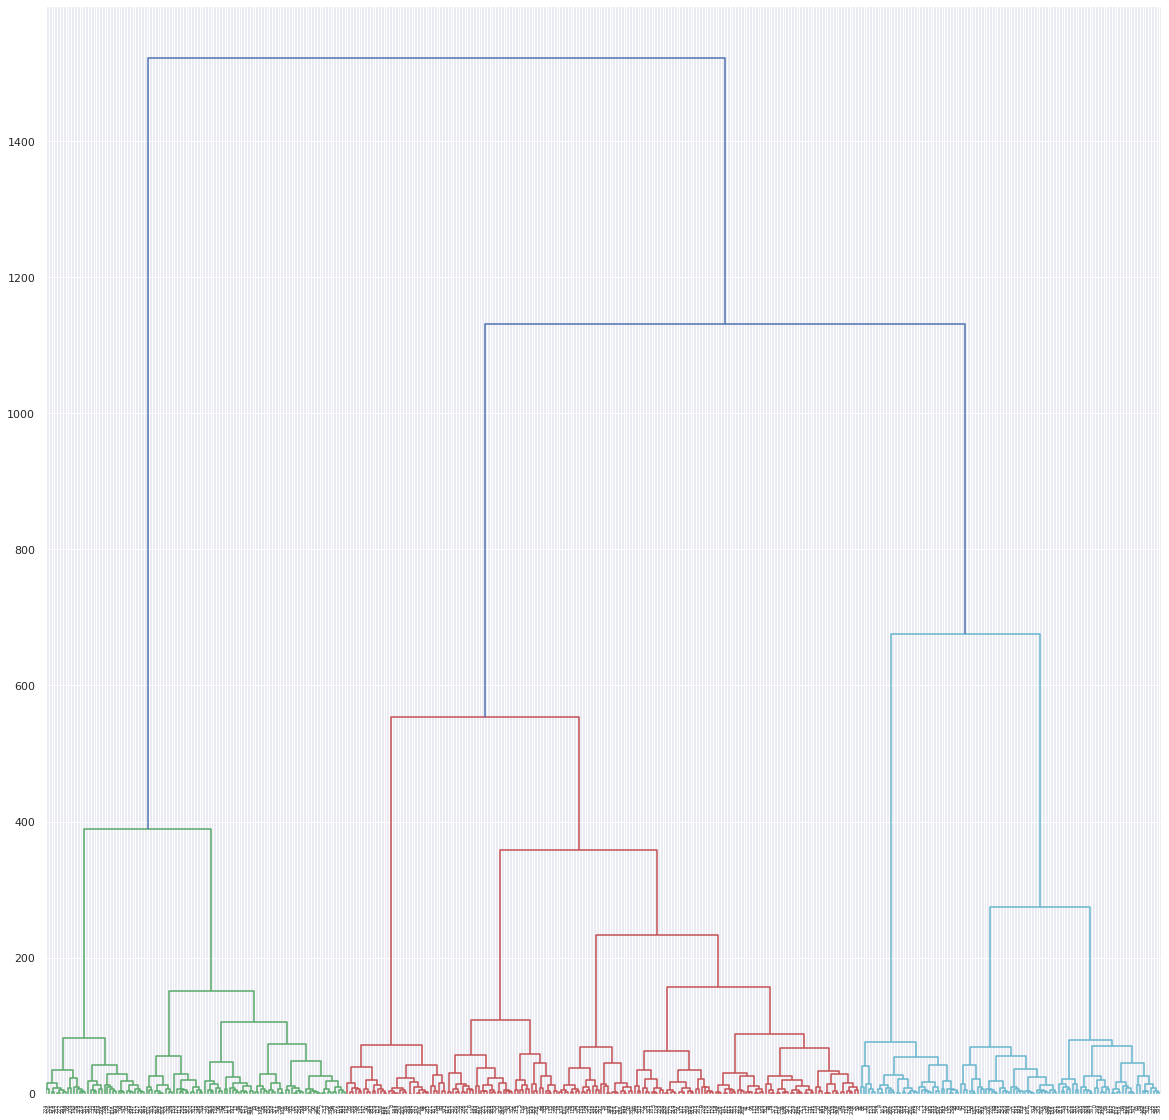

In [28]:
# Najpierw spojrzę na hierarchię

from scipy.cluster import hierarchy


D = hierarchy.linkage(data, method='ward')
hierarchy.dendrogram(D)
plt.show()

Wykres nie daje jednoznacznej informacji co do liczby klastrów, bardziej istotna wydaje się informacja jak szybko uzyskamy oczekiwaną liczbę grup.

In [9]:
# wykorzystam wbudowaną w sklearn metodę do obliczania indeksu DB
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
def indeks_DB(startk,endk,data):
    scores = []
    for i in range(startk,endk+1):
        labels = (AgglomerativeClustering(n_clusters=i)).fit(data).labels_
        scores.append(davies_bouldin_score(data,labels))
     
    # data 
    df = pd.DataFrame({'clusters':[i for i in range(startk,endk+1)],'Indeks_DB':scores})
    
    # plot 
      #
    plt.plot(df.clusters, df.Indeks_DB, 'bx-',markersize=12)
    plt.xlabel('Cluster')
    plt.ylabel('DB')
    plt.xticks(fontsize=14)
    plt.title('Indeks DB ')
    plt.xticks([i for i in range(startk,endk+1)])
    plt.show()

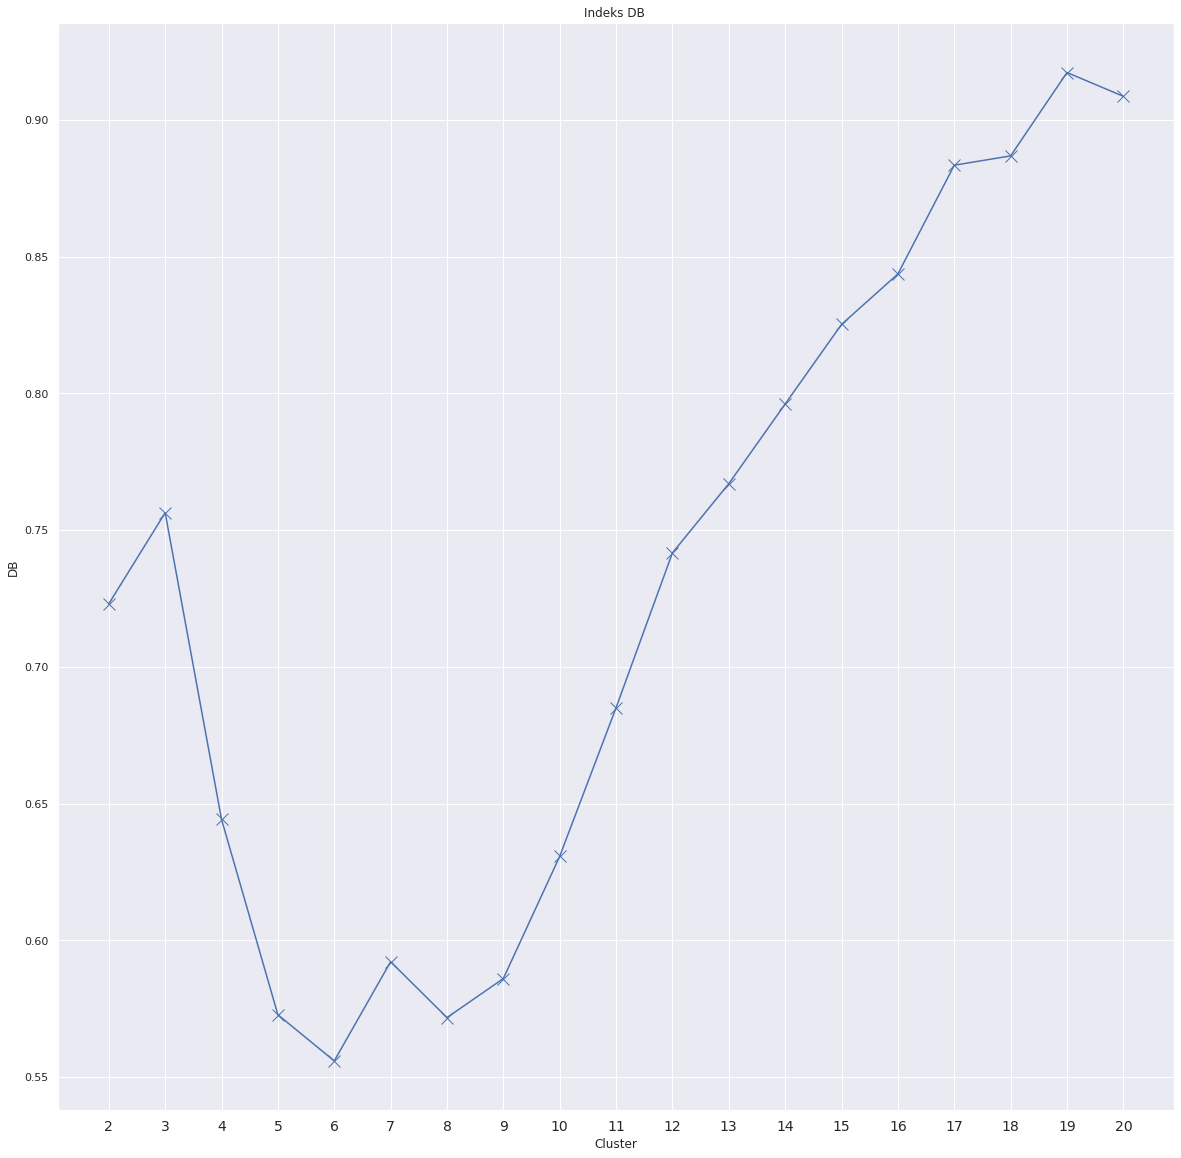

In [10]:
indeks_DB(2,20,data)

W tym wypadku algorytm jednoznacznie wskazał na 6 klastrów. Co już można uznać za przewagę nad metodą łokciową.

Text(0.5, 1.0, 'AgglomerativeClustering')

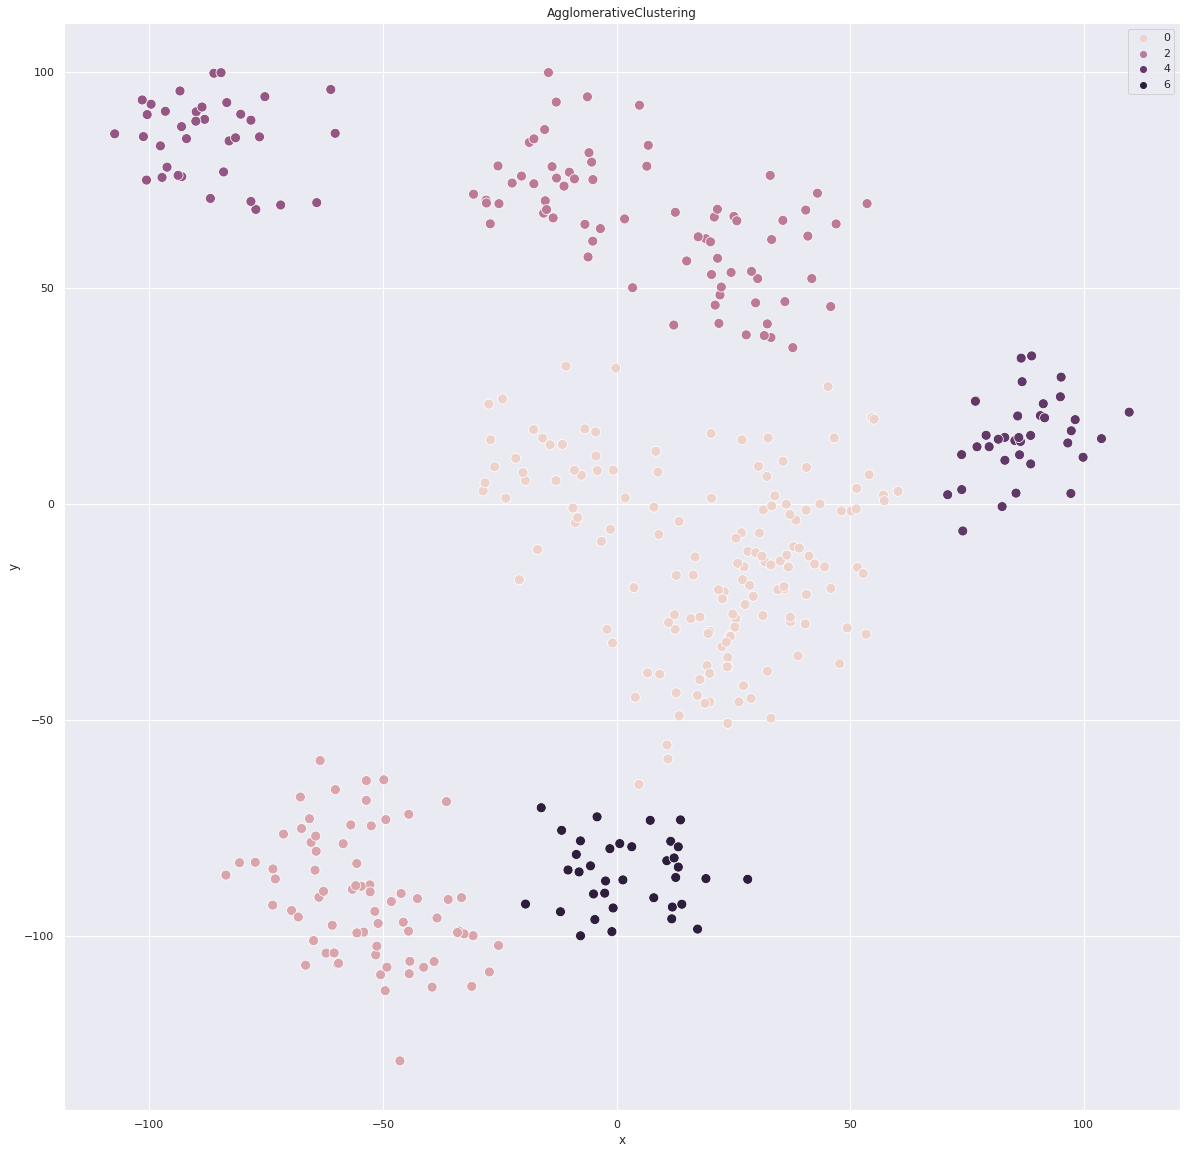

In [35]:
sns.scatterplot(data=data,x='x',y='y',s=100,hue=(AgglomerativeClustering(n_clusters=6)).fit(data).labels_).set_title('AgglomerativeClustering')

Wynik dość znacznie różni się od klasteryzacij uzyskanej metodą Kmeans.

/home/jan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


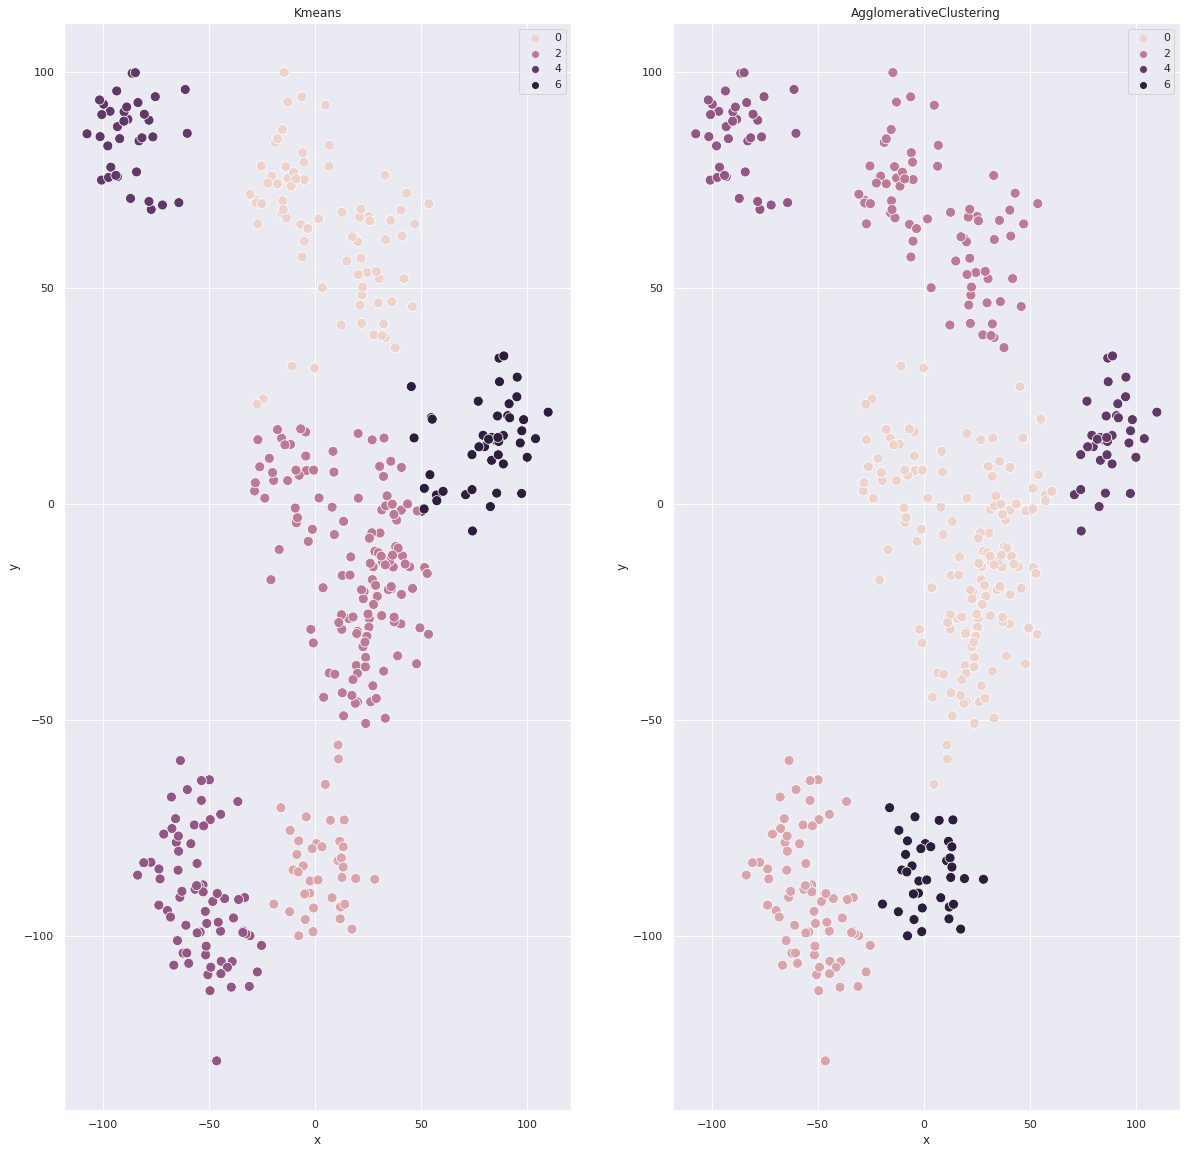

In [37]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data=data,x='x',y='y', ax=ax[0],hue=label_gen(data,6),s=100).set_title('Kmeans')
sns.scatterplot(data=data,x='x',y='y',s=100,hue=(AgglomerativeClustering(n_clusters=6)).fit(data).labels_).set_title('AgglomerativeClustering')
fig.show()

Widać wyraźnie różnicę przede wszystkim w przypadku klastra centralnego ,który jest podzielony w nieco inny sposób. Nie da się powiedzieć, która klasteryzacja osiągnęła lepszy rezultat. Moim zdaniem lepszy podział uzyskał algorytm hierarchiczny ale jest to wyłącznie subiektywna opinia.